In [1]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

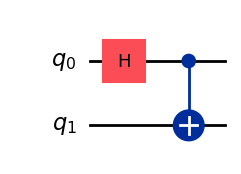

In [4]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

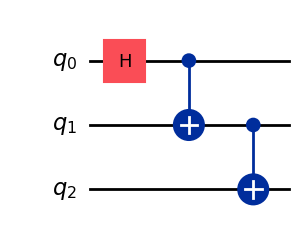

In [5]:
# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
qc.h(0)
# Add a CNOT gate to qubits 0 and 1
qc.cx(0,1)
# Add a CNOT gate to qubits 1 and 2
qc.cx(1,2)
### YOUR CODE FINISHES HERE    ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

In [6]:
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


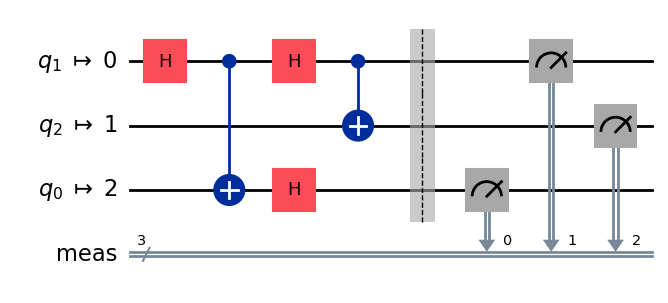

In [18]:
### WRITE YOUR CODE BELOW HERE ###
# Write the coupling map of connections between qubits 0 and 1 and 0 and 2 as a list of pairs: [[0,1],...]
coupling_map =[[0,1],[0,2]]

# Transpile the quantum circuit `qc` using the `transpile` function and the coupling map
from qiskit import transpile
qc_transpiled = transpile(qc, coupling_map=coupling_map)
### YOUR CODE FINISHES HERE    ###

qc_transpiled.draw("mpl")

In [11]:
grade_lab0_ex2(qc_transpiled)


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [12]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

In [13]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

  Outcomes : {'000': 489, '111': 535}


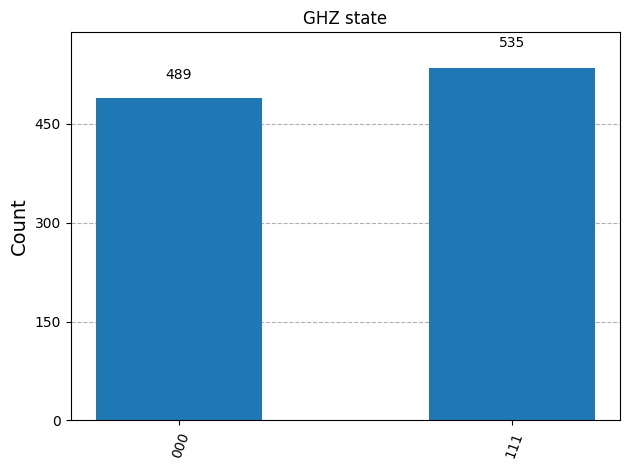

In [14]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(-0.0048828125)), ('ZZX', np.float64(-0.02001953125)), ('ZII', np.float64(-0.0048828125)), ('XXI', np.float64(-0.00634765625)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


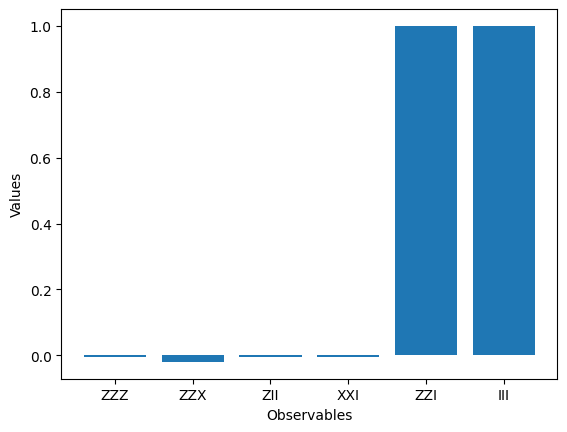

In [15]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [1]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 621 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab


In [2]:
# Define the service. This allows you to access IBM QPUs.
service = QiskitRuntimeService(name="qgss-2025")

# Get a backend
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")

We are using the ibm_torino quantum computer


In [3]:
### WRITE YOUR CODE BELOW HERE ###
# Step 1. Map
# You should have created a GHZ circuit above and assigned with variable `qc`
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
# Step 2. Optimize
coupling_map =[[0,1],[0,2]]
qc.measure_all()
from qiskit import transpile
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
qc_transpiled = transpile(qc, coupling_map=coupling_map)

In [4]:
# Step 3. Execute
sampler = Sampler(mode=backend)
job = sampler.run(pm.run([qc]))
#service.job("d1jkvcva572c73950pj0")


Outcomes : {'111': 1451, '000': 1851, '110': 296, '010': 83, '100': 74, '011': 99, '001': 220, '101': 22}


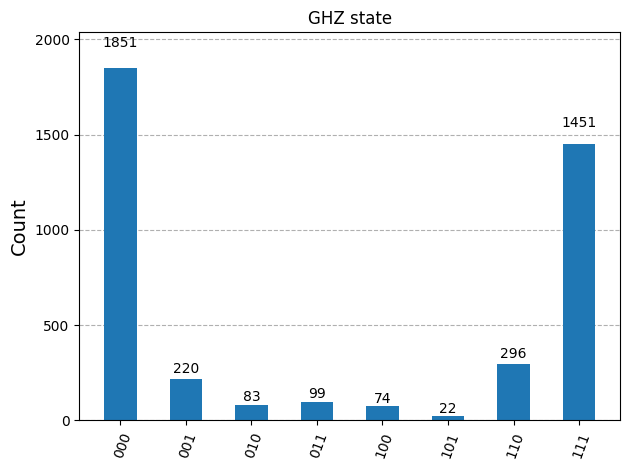

In [5]:
# Step 4. Post-process
results_sampler = job.result()
counts_list = results_sampler[0].data.meas.get_counts()
### YOUR CODE FINISHES HERE    ###

print(f"Outcomes : {counts_list}")
plot_histogram(counts_list,title='GHZ state')